In [45]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/gozmit/Desktop/labelled_data.csv')

In [9]:
df.columns

Index(['body', 'label'], dtype='object')

In [7]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [22]:
df.head()

,body,label
0,"hello, the necessary has been done, however...",others
1,"hi, we can not stop with debit card looks ---...",Banking
2,carrasco-chaves jaszczyszyn concerning your h...,others
3,"dear mister sieradzan, i read your request co...",card
4,"hello, I max to do the necessary concerning t...",others


In [24]:
df.label.value_counts()

others                         453
Account                        104
Communication                   80
card                            67
Enquiry                         58
Banking                         43
Mail_Package_Delivery           20
Auditing                        10
Loans_Credit_Lending             9
Investing                        7
Insurance                        3
Currencies_Foreign_Exchange      3
Name: label, dtype: int64

In [25]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df.body).toarray()

labels = df.label

print("Each of the %d body is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 857 body is represented by 3495 features (TF-IDF score of unigrams and bigrams)


In [31]:
df.label.value_counts()

others                         453
Account                        104
Communication                   80
card                            67
Enquiry                         58
Banking                         43
Mail_Package_Delivery           20
Auditing                        10
Loans_Credit_Lending             9
Investing                        7
Insurance                        3
Currencies_Foreign_Exchange      3
Name: label, dtype: int64

In [28]:
df_bool = {'Account': 0, 'Communication': 1, 'card':2, 'Enquiry' : 3, 'Banking' : 4, 'Mail_Package_Delivery':5, 'Auditing':6 ,
           'Loans_Credit_Lending': 7, 'Investing': 8, 'Insurance': 9, 'Currencies_Foreign_Exchange': 10 ,'others':11}

In [37]:
df2 = df.replace({'label': df_bool})

In [38]:
df2.head()

,body,label
0,"hello, the necessary has been done, however...",11
1,"hi, we can not stop with debit card looks ---...",4
2,carrasco-chaves jaszczyszyn concerning your h...,11
3,"dear mister sieradzan, i read your request co...",2
4,"hello, I max to do the necessary concerning t...",11


In [42]:
X = df2['body'] # Collection of documents
y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10,
                                                    random_state = 0)

In [46]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [47]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.474265,0.034502
LogisticRegression,0.529935,0.009797
MultinomialNB,0.533267,0.005272
RandomForestClassifier,0.528779,0.009864


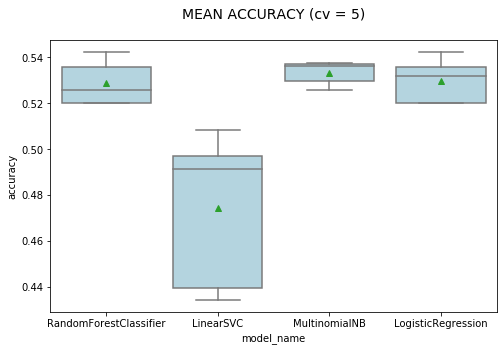

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [51]:
new_complaint = ''' hello Madam cyganik, following your request, we can open a booklet that works like the ldd (same rate: 0.12%) whose ceiling is 22220 ?. In addition, I take this message to inform you of our temporary offer (until 10/10/2012) which corresponds to your profile and for that I wanted to make you benefit from it. 1.00% * on a 1-month fixed rate heath-knight account with a minimum amount of 10,000? and a maximum amount of 1,000,000 ?. at the end of 1 month the funds are switched to your current account. * gross annual no-oil rate, excluding income tax and social security contributions applicable in accordance with the regulations in force for French resident tax residents. a single heath-knight per natural person this offer is also available for our non-resident clients (tax exemption on interest) know that there is no management fee taken at opening mauro at closing . serna-henriques-almeida necessary you can also close early the heath-knight, reducing the rate of remuneration to 0.20%. this type of account can be opened remotely since you will receive a link to e-sign by romano. I am at your disposal for any further information. speer-vienna-guardia-torrecilla of barriga-adem ----- original message ----- of: cyganik na: bohnbach-dowerg / bank france date: 22/10/2012 11:11:11 subject: my accounts ma&#39;am, sir, I allow myself to contact you because I received on Tuesday 22 company-4913.net a transfer of 12 000 euros (scholarship awarded by my university); however my savings account, the ldds is capped at 12 000 euros (and to date, following a recent transfer) my balance is 11 0001, 12 euros. I absolutely have to set aside 11,000 euros. what should I do ? thank you very much. Yours truly, n cyganik 
'''
print(model.predict(fitted_vectorizer.transform([new_complaint])))

[5]
